# EDA (Text and Images)

In [ ]:
import pandas as pd
import numpy as np 
from datasets import load_dataset

# the 4th data split
data = load_dataset("jmhessel/newyorker_caption_contest", "explanation_4")
df_train = pd.DataFrame(data['train'])
df_test = pd.DataFrame(data['test'])
df_val = pd.DataFrame(data['validation'])


In [ ]:
df_train.head(2)

,image,contest_number,image_location,image_description,image_uncanny_description,entities,questions,caption_choices,from_description,label,n_tokens_label,instance_id
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,721,a sandbox,A kid makes a sand very tall tower with someon...,It is not usual that kids make sand towers ove...,[https://en.wikipedia.org/wiki/Sand_art_and_pl...,[Why did the kid make the tower?],I'm starting to regret that haircut.,scene: a sandbox description: A kid makes a sa...,A reference to the fairy tale Rapunzel: in tha...,73,24fc00eca85363265c95fcc13bea5d37
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,13,a bedroom,A couple are lying on a bed together. The man...,It's unusual for a man to be lying in bed dres...,"[https://en.wikipedia.org/wiki/Foreplay, https...",[Why is that man dressed like that?],"Okay. Now you be the naughty mosquito, and I'l...",scene: a bedroom description: A couple are lyi...,A literal enumeration that pokes fun at the sp...,65,ac48a0768134071dbd9db3e5c64ec96d


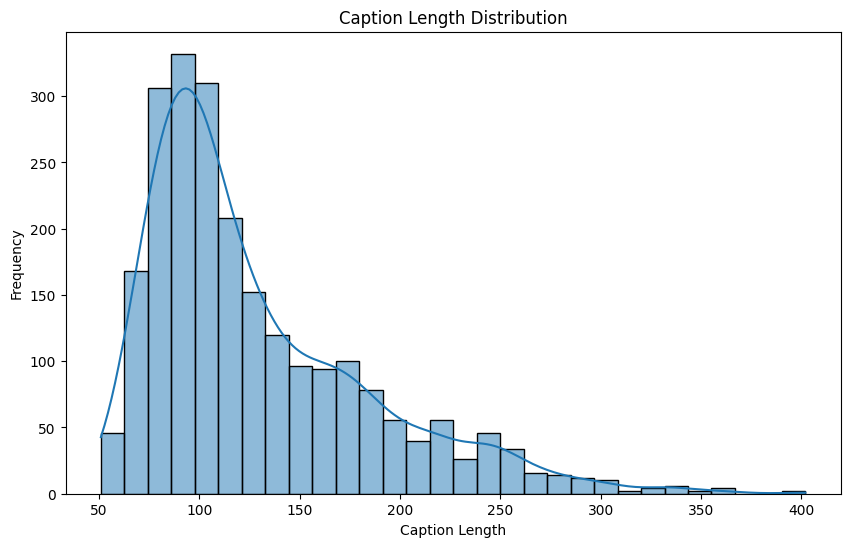

In [ ]:
# Caption length distribution
df_train['caption_length'] = df_train['image_description'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['caption_length'], bins=30, kde=True)
plt.title('Caption Length Distribution')
plt.xlabel('Caption Length')
plt.ylabel('Frequency')
plt.show()

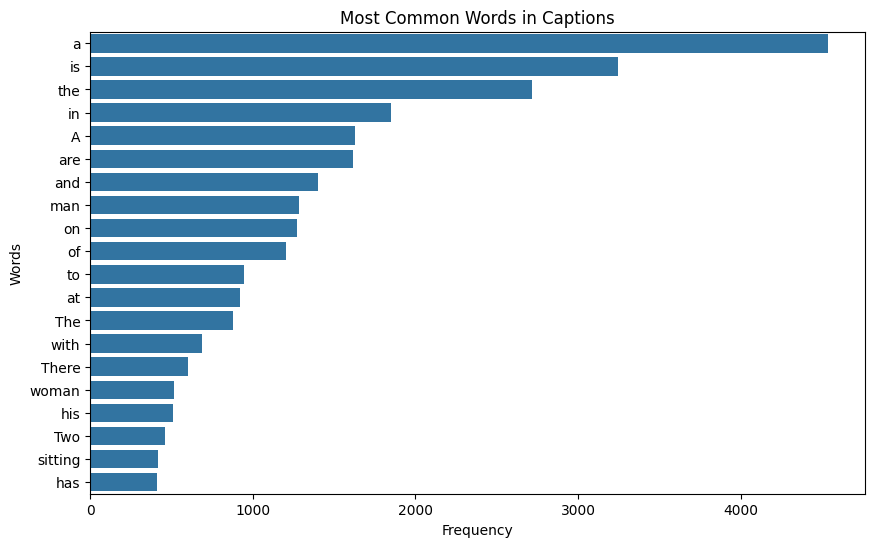

In [ ]:
# Plotting common words
from collections import Counter
all_words = ' '.join(df_train['image_description']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Most Common Words in Captions')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

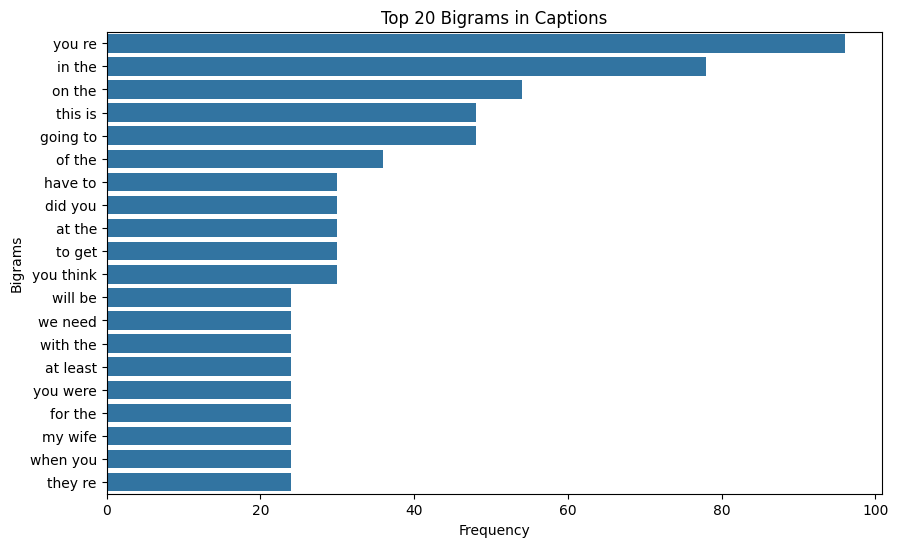

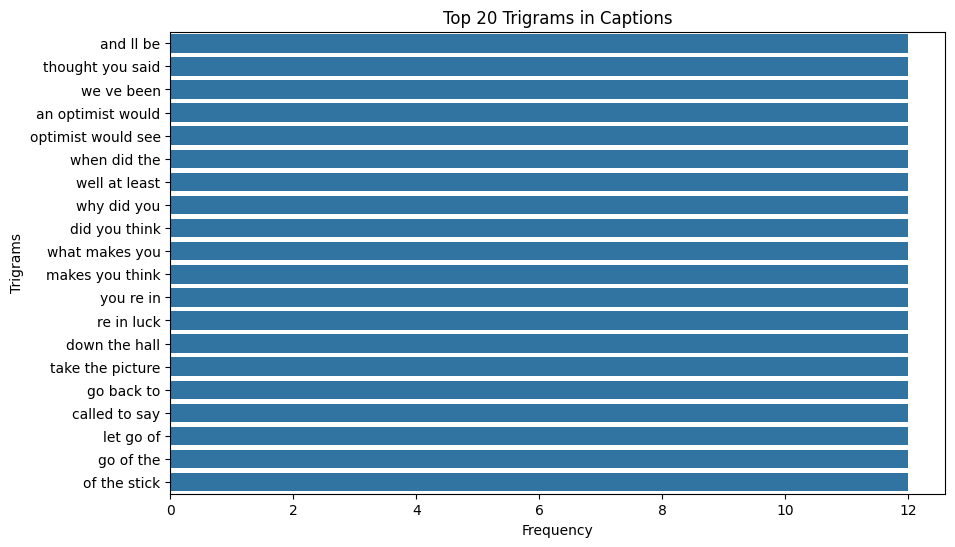

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def get_top_n_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_n_ngrams(df_train['caption_choices'], n=20, ngram_range=(2, 2))
top_trigrams = get_top_n_ngrams(df_train['caption_choices'], n=20, ngram_range=(3, 3))

# Plotting the top bigrams
bigrams, bigram_counts = zip(*top_bigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(bigram_counts), y=list(bigrams))
plt.title('Top 20 Bigrams in Captions')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

# Plotting the top trigrams
trigrams, trigram_counts = zip(*top_trigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(trigram_counts), y=list(trigrams))
plt.title('Top 20 Trigrams in Captions')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()


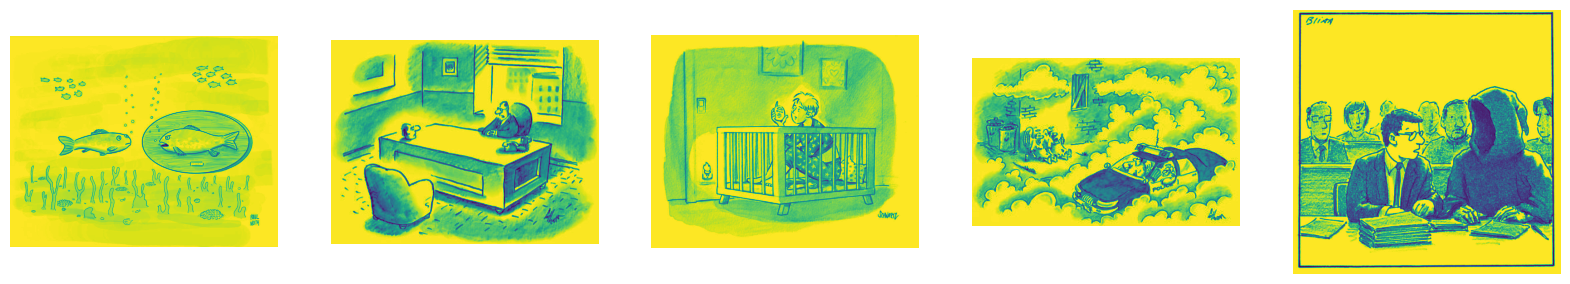

In [ ]:
# Display a few sample cartoons
sample_images = df_train['image'].sample(5).values
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for img, ax in zip(sample_images, axes):
    ax.imshow(img)
    ax.axis('off')
plt.show()

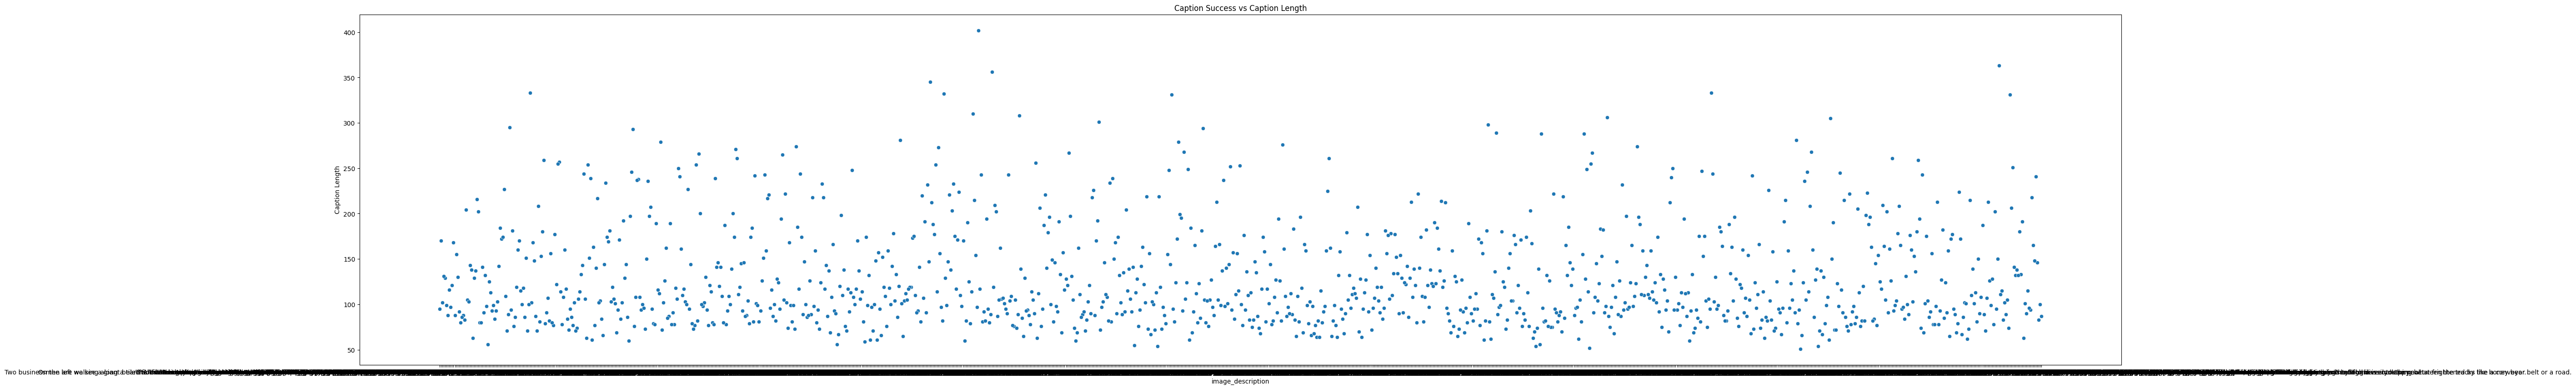

In [ ]:
# Assuming 'image_description' is the success metric
if 'image_description' in df_train.columns:
    plt.figure(figsize=(50, 10))
    sns.scatterplot(x='image_description', y='caption_length', data=df_train)
    plt.title('Caption Success vs Caption Length')
    plt.xlabel('image_description')
    plt.ylabel('Caption Length')
    plt.show()

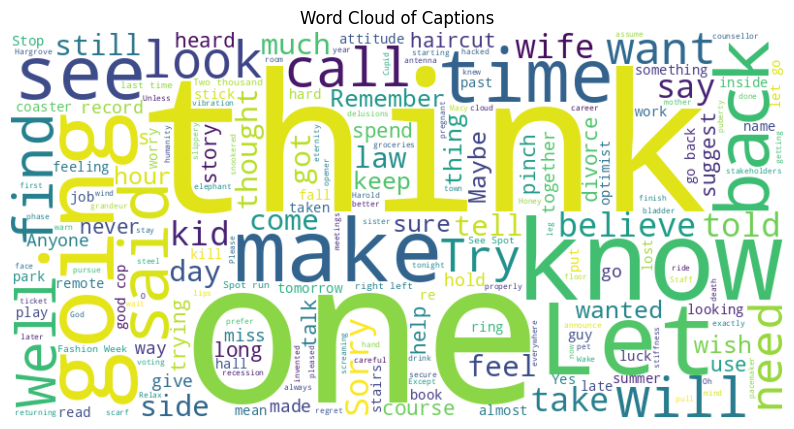

In [ ]:
from wordcloud import WordCloud

all_captions = ' '.join(df_train['caption_choices'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_captions)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Captions')
plt.show()
